# Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random input data to train on

In [2]:
# we are doing this to see whether our methodology works or not. In real life, we load normal data.

obs = 1000 # 1000 or 10000 or 1000000
xs = np.random.uniform(low=-10, high=10, size=(obs,1)) # draws a random value from the interval and each number has equal chance to be selected
zs = np.random.uniform(-10, 10, (obs, 1))

inputs = np.column_stack((xs, zs)) # takes a sequence of 1D arrays and stacks them into a single 2D array


# Create the targets we will aim at

- #### targets = f(x,z) = 2*x - 3*z + 5 + noise 
we decide this target. it can be anything else.

In [3]:
noise = np.random.uniform(-1,1, (obs, 1))

targets = 2*xs - 3 * zs + 5 + noise

print(targets.shape)

(1000, 1)


# Plot the training data

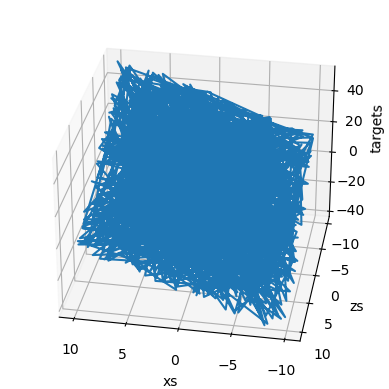

In [5]:
# in order to use the 3D plot, the object should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.

targets = targets.reshape(obs, )
xs = xs.reshape(obs, )
zs = zs.reshape(obs, )


fig = plt.figure()

# a method allowing us to certain the 3D plot
ax = fig.add_subplot(111, projection= "3d")

# Choose the axes
ax.plot(xs, zs, targets)

# set label
ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("targets")

# you can fiddle with the azim parameter to plot the data from different angles. just change the value of azim=100
# to azim=0; azim=200 or whatever. check and see what happens 
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(obs, 1)

# Initalize the variables

In [7]:
init_range = 0.1 # our initial weights and biases will be picked randomly from the interval [-0.1, 0.1]

weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range, size=(1,1))

print(weights)
print("-------")
print(biases)

[[-0.05019074]
 [-0.00094715]]
-------
[[-0.04315048]]


# Set a learning rate

In [8]:
learning_rate = 0.02 # we found this learning rate useful for this demonstration (nothing special)

# Train the model

for each iteration:
    - calculate outputs
    - compare outputs to targets through the loss
    - print the loss
    - adjust the weights and biases

In [14]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases #inputs = 1000x1 weights = 2x1 ===> outputs=1000x1
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / obs #l2-norm loss formula
    print("loss: ", loss)
    
    deltas_scaled = deltas / obs
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) # gradient methods
    #2x1      2x1         scalar               1000x2, 1000x1, we cannot product the inputs. so we need to tranpose it.
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

loss:  0.3840622425538454
loss:  0.37523458315941755
loss:  0.36675608866607035
loss:  0.3586129483769124
loss:  0.3507918978565721
loss:  0.343280197324633
loss:  0.33606561090369347
loss:  0.3291363866882317
loss:  0.32248123760182196
loss:  0.3160893230115112
loss:  0.30995023106941577
loss:  0.3040539617527648
loss:  0.2983909105747736
loss:  0.2929518529398079
loss:  0.28772792911735384
loss:  0.28271062981032535
loss:  0.2778917822941914
loss:  0.2732635371043499
loss:  0.26881835525006276
loss:  0.26454899593412745
loss:  0.2604485047582758
loss:  0.2565102023950894
loss:  0.2527276737079845
loss:  0.24909475730153668
loss:  0.24560553548512853
loss:  0.242254324633568
loss:  0.2390356659289817
loss:  0.23594431646889374
loss:  0.23297524072601797
loss:  0.23012360234583795
loss:  0.2273847562686281
loss:  0.22475424116307133
loss:  0.2222277721591579
loss:  0.21980123386851905
loss:  0.21747067368083658
loss:  0.21523229532539642
loss:  0.21308245268731227
loss:  0.211017643868

# Print weights and biases and see if we have worked correctly

In [15]:
print(weights)
print("------")
print(biases)

[[ 2.00900753]
 [-3.00438784]]
------
[[4.89986363]]


- #### 2x - 3z + 5 + noise
weights of x and z seem ok but biases is a bit different from 5. Since we didnt used proper the learning rate. Yet we can improve it by running the code again and again.

# Plot the last outputs vs targets

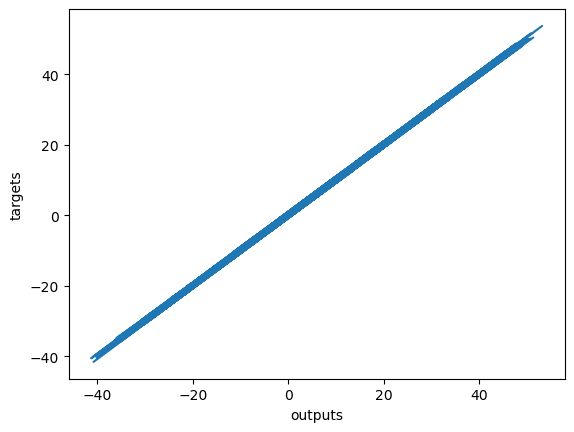

In [16]:
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()

- #### our model works very well